# 3 - Linear Regression

```
描述：PyTorch 实现 Linear Regression（线性回归）算法
作者：Chenyyx
时间：2019-12-18
```

```
目录：
3.1 - 基础版 Linear Regression 实现
3.2 - 进阶版 Linear Regression 实现
    - 3.2.1 - 进阶版本1 --- 使用更加简洁的代码来实现
    - 3.2.2 - 进阶版本2 --- 解决更加有难度的问题 - 多项式回归模型
3.3 - 附加 - Scikit-Learn 版 Linear Regression 实现
```

## 3.1 - 基础版 Linear Regression 实现

In [1]:
# 导入必要的库
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

注意，PyTorch 在 **0.4.0** 版本之前是具有 `Tensor` 和 `Variable` 的相应的 API 的，创建计算 `Tensor` 的时候需要使用 `Variable`，0.4.0 版本之后，将 `Tensor` 与 `Variable` 合并成一个 `Tensor` 了。所以现在我们直接就是用 `Tensor` 就可以了。

In [2]:
# 设置一个随机种子
torch.manual_seed(2019)

In [3]:
# 设置训练数据，包括 训练特征（x_train） 和 训练标签（y_train）
x_train = np.array([[3.51], [4.32], [5.8], [6.24], [7.9], [4.236],
                    [10.569], [7.158], [7.639], [1.134], [7.422],
                    [10.81], [6.021], [8.002], [2.958]], dtype=np.float32)
y_train = np.array([[1.732], [2.414], [2.039], [2.919], [1.594], [1.757],
                    [2.962], [2.561], [3.333], [1.222], [2.933],
                    [3.652], [2.865], [2.934], [1.314]], dtype=np.float32)

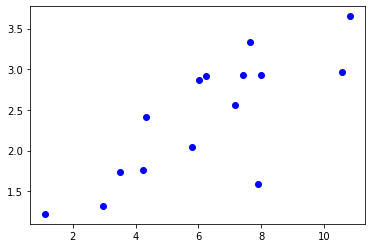

In [4]:
# 将训练数据在图上画出来
plt.plot(x_train, y_train, 'bo')

In [5]:
# convert ndarray to Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# set up param w and b
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# construct linear model
def my_linear_model(x):
    return x * w + b

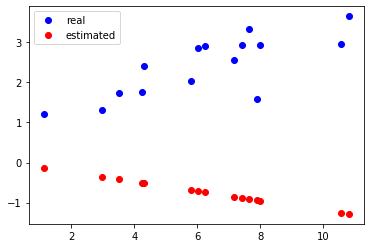

In [6]:
# let us have a look to the predict result
y_predict = my_linear_model(x_train)

# plot the predict result
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_predict.data.numpy(), 'ro', label='estimated')
plt.legend()

我们可以看到，我们构建的 `线性模型` 对实际数据的拟合效果很差，甚至说一点都没有拟合上。

**注意：** 红色的点在图上看来，似乎是处于一条直线上，思考一下，是否在一条直线上呢？

接下来，我们要进行计算误差了，也就是我们的 **预测值 与 实际值** 之间的差值。

$$\frac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^{2}$$

In [7]:
# 计算 loss
def get_loss(y_predict, y_train):
    return torch.mean(y_predict - y_train) ** 2

# 调用 get_loss
loss = get_loss(y_predict, y_train)

# 将 loss 打印出来
print(loss)

tensor(9.9683, grad_fn=<PowBackward0>)


定义好了误差函数，接下来我们需要计算 `w` 和 `b` 的梯度了，这时得益于 PyTorch 的 **自动求导** ，我们不需要手动去计算梯度，有兴趣的同学可以手动计算一下， `w` 和 `b` 的梯度分别是

$$\frac{\partial}{\partial w} = \frac{2}{n}\sum_{i=1}^{n}x_i(wx_i+b-y_i)$$

$$\frac{\partial}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}x_i(wx_i+b-y_i)$$

In [8]:
# 自动求导
loss.backward()

# 将 w 的导数 和 b 的导数打印出来
print(w.grad)
print(b.grad)

tensor([-39.4527])
tensor([-6.3145])


In [9]:
# 更新 w 和 b
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

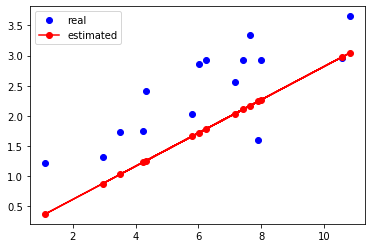

In [10]:
# w 和 b 更新完成之后，我们再次将图片打印出来
y_predict = my_linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_predict.data.numpy(), 'ro-', label='estimated')
plt.legend()

是不是发现，红色的拟合线稍微有些改善了。虽然有些改善，但是仍然效果不好。怎么才能拟合效果很好呢？我们可以尝试多更新几次 :)

In [11]:
# 因为上面我们已经进行了一次求导，所以这里要接着往下进行的话，需要先将导数归零
w.grad.zero_()
b.grad.zero_()

# 开始迭代训练，设置迭代次数
epoch = 200

for e in range(epoch):
    y_ = my_linear_model(x_train)
    loss = get_loss(y_, y_train)

    loss.backward()

    w.data = w.data - 1e-2 * w.grad.data  # update w
    b.data = b.data - 1e-2 * b.grad.data  # update b
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e + 1, loss.data))

epoch: 20, loss: 0.2608129680156708
epoch: 40, loss: 0.12130650132894516
epoch: 60, loss: 0.024303480982780457
epoch: 80, loss: 0.0024921540170907974
epoch: 100, loss: 0.06322188675403595
epoch: 120, loss: 0.18602779507637024
epoch: 140, loss: 0.329528272151947
epoch: 160, loss: 0.44536706805229187
epoch: 180, loss: 0.4945094883441925
epoch: 200, loss: 0.4603951573371887


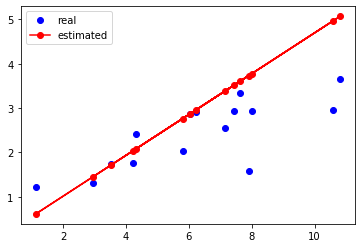

In [12]:
# 训练完成之后，再次查看一下
y_ = my_linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro-', label='estimated')
plt.legend()

经过我们上面的迭代训练，`w` 和 `b` 更新 200 次之后，拟合曲线已经拟合的比较好了。如果还不满意的话，我们还可以接着调整 epoch 迭代次数，继续训练，直到符合你的标准为止。

## 3.2 - 进阶版 Linear Regression 实现

所谓进阶版，就是使用 PyTorch 熟练之后，使用更加简洁明了的 代码或 API 解决同样的问题，或者解决更加具有难度的问题。

**注意：** 如果对于 PyTorch 使用还不怎么熟悉，建议熟悉 PyTorch 之后，再查看 **进阶版本** 的使用。

### 3.2.1 - 进阶版本1 --- 更加简洁的代码

In [13]:
# 导入相应的库
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

⚠️注意：在这里，我们引入了一个 `torch.nn` 的库，它包含 PyTorch 里的神经网络相关的 API（包括线性模型（Linear Model）），只要你使用 PyTorch 进行训练深度学习，那么一定会用到这个库的。

In [14]:
# 设置超参数
input_size = 1  # 输入的 size
output_size = 1  # 输出的 size
num_epochs = 100  # 迭代次数
learning_rate = 0.001  # 学习率

In [15]:
# 构建 训练数据集
x_train = np.array([[3.51], [4.32], [5.8], [6.24], [7.9], [4.236],
                    [10.569], [7.158], [7.639], [1.134], [7.422],
                    [10.81], [6.021], [8.002], [2.958]], dtype=np.float32)
y_train = np.array([[1.732], [2.414], [2.039], [2.919], [2.094], [1.757],
                    [2.962], [2.561], [3.333], [1.222], [2.933],
                    [3.652], [2.865], [2.934], [1.314]], dtype=np.float32)

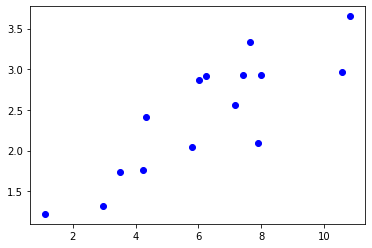

In [16]:
# 将训练数据在图上画出来
plt.plot(x_train, y_train, 'bo')

In [17]:
# 进阶版线性模型的构建，直接从 nn 中引用线性模型
model = nn.Linear(input_size, output_size)

In [18]:
# 设置 loss 和 优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [19]:
# 训练模型
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [10/100], Loss: 0.3919
Epoch [20/100], Loss: 0.2314
Epoch [30/100], Loss: 0.2085
Epoch [40/100], Loss: 0.2049
Epoch [50/100], Loss: 0.2041
Epoch [60/100], Loss: 0.2036
Epoch [70/100], Loss: 0.2032
Epoch [80/100], Loss: 0.2029
Epoch [90/100], Loss: 0.2025
Epoch [100/100], Loss: 0.2021


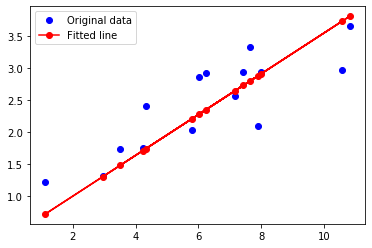

In [20]:
# 将图画出来
y_predict = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'bo', label='Original data')
plt.plot(x_train, y_predict, 'ro-', label='Fitted line')
plt.legend()

In [21]:
# 如果保存模型的话，则保存
# torch.save(model.state_dict(), 'model.ckpt')

### 3.2.2 - 进阶版本2 --- 解决更加有难度的问题 - 多项式回归模型

什么是多项式回归呢？我们首先看前面介绍的简单的线性模型：

$$
\hat{y} = w x + b
$$

这里是关于 `x` 的一个一次多项式，这个模型很简单，没有办法拟合比较复杂的模型，所以我们可以使用更高次的模型，比如

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$

这样就能够拟合更加复杂的模型，这就是多项式模型，这里使用了 `x` 的更高次(`x` 的 2 次，3次)，同理还有多元回归模型，形式也是一样的，只是出了使用 `x`，还是更多的变量，比如 `y`、`z` 等等，同时他们的 `loss` 函数和简单的线性回归模型是一致的。

首先我们可以先定义一个需要拟合的目标函数，这个函数是个三次的多项式(即 `x` 的最高次为 3 次)

In [22]:
# 定义一个多项式函数
w_final = np.array([0.3, 2.8, 2.7]) # 定义参数
b_final = np.array([0.9]) # 定义参数

# 将多项式打印出来
multi_f = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_final[0], w_final[0], w_final[1], w_final[2])

print(multi_f)

y = 0.90 + 0.30 * x + 2.80 * x^2 + 2.70 * x^3


我们先把这个多项式函数在图上画出来，如下。

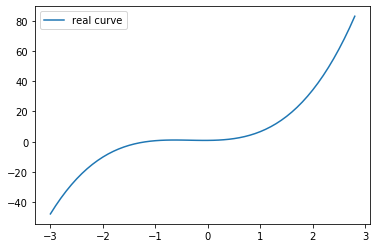

In [23]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 2.9, 0.1)
y_sample = b_final[0] + w_final[0] * x_sample + w_final[1] * x_sample ** 2 + w_final[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

接着，就需要我们构建自己的数据集（在实际使用中，训练数据通常是采集而来，并不是自己编写的），需要 `x`（自变量） 和 `y`（因变量） ，同时这是一个三次的多项式，所以我们取 $x, x^2, x^3$

In [24]:
# 构建数据
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor

y_train = torch.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor

接着我们可以定义需要优化的参数，就是前面函数中的 $w_i$

In [25]:
# 定义参数和模型
w = torch.randn(3, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# # 将 x_train 和 y_train 转为 Tensor
# x_train = torch.Tensor(x_train)
# y_train = torch.Tensor(y_train)

# torch.mm 表示两个矩阵相乘
def my_multi_linear(x):
    return torch.mm(x, w) + b

# 定义 loss 函数
def get_multi_loss(y_pred, y):
    return torch.mean((y_pred - y_train) ** 2)

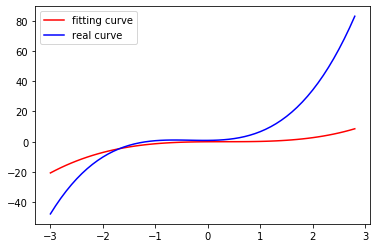

In [26]:
# 画出更新之前的模型 和 真实数据 之间的对比
y_pred = my_multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

如上图，红色的线是咱们现在的模型画出来的样子，蓝色的线是真实数据的样子。可以看出，咱们现在的模型与真实数据之间还是有较大的差距的。接下来，我们计算一下他们之间的误差。

还要说明一下，我们这里计算误差是 **和一元的线性模型的误差计算是相同的** ，前面我们已经定义过了 `get_loss` 函数，我们这里的 `get_multi_loss` 函数和之前的 `get_loss` 函数是一样的。

In [27]:
# 计算误差
multi_loss = get_multi_loss(y_pred, y_train)
print(multi_loss)

tensor(524.0369, grad_fn=<MeanBackward0>)


In [28]:
# 自动求导
multi_loss.backward()

In [29]:
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([[ -60.0704],
        [ -74.9231],
        [-362.5527]])
tensor([-17.5141])


In [30]:
# 更新参数
multi_learning_rate = 0.001
w.data = w.data - multi_learning_rate * w.grad.data
b.data = b.data - multi_learning_rate * b.grad.data

经过上面的更新操作，我们就已经进行了一次参数的更新，下面我们查看一下更新一次之后的模型的样子。

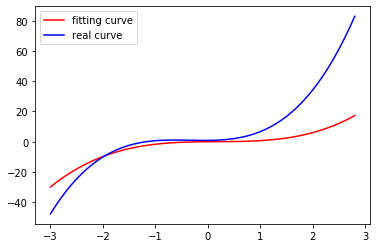

In [31]:
# 更新一次之后的模型
y_pred = my_multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

上图看起来并不是拟合得很好，虽然更新了一次，但是两条曲线之间的差距依然很明显，那我们进行迭代更新 200 次再看一下。

In [32]:
# 进行 200 次参数的迭代更新
epoch = 200  # 迭代次数

for e in range(epoch):
    y_pred = my_multi_linear(x_train)
    multi_loss = get_multi_loss(y_pred, y_train)
    
    # 将 w 和 b 的梯度先归零，这是因为之前我们已经更新过一次参数了，w 和 b 的梯度还存在值，如果前面
    # 我们没有进行求一次梯度，那么我们就需要加上判断是不是第一次梯度清零，第一次的话，系统会将 grad 初始化为 None，就会出错了
#     if e != 0:
    w.grad.data.zero_()
    b.grad.data.zero_()
    multi_loss.backward()
    
    # 更新参数
    w.data = w.data - 0.01 * w.grad.data
    b.data = b.data - 0.01 * b.grad.data
    if (e + 1) % 20 == 0:
        print ('Epoch [{}/{}], Multi_Loss: {:.4f}'.format(e+1, epoch, multi_loss.data))

Epoch [20/200], Multi_Loss: 130.6432
Epoch [40/200], Multi_Loss: 80.0295
Epoch [60/200], Multi_Loss: 49.0249
Epoch [80/200], Multi_Loss: 30.0322
Epoch [100/200], Multi_Loss: 18.3976
Epoch [120/200], Multi_Loss: 11.2703
Epoch [140/200], Multi_Loss: 6.9042
Epoch [160/200], Multi_Loss: 4.2296
Epoch [180/200], Multi_Loss: 2.5911
Epoch [200/200], Multi_Loss: 1.5874


可以看到，更新完成之后， `loss` 变得非常小了，我们可以画出更新完成之后的 **预测曲线** 与 **真实曲线** 之间的对比。

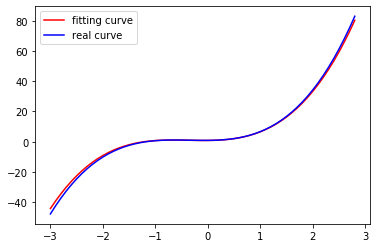

In [33]:
# 画出更新之后的结果
y_pred = my_multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

现在就可以看到啦，经过 200 次的迭代更新，可以看到拟合的线和真实的数据曲线已经差不多完全重合了。

**练习题：上面的例子是一个三次的多项式，请尝试使用一个简单的二次多项式，并自己实现线性模型去拟合它，查看最终能够得到的结果。**

⚠️**小提示：参数是 w = torch.randn(2, 1, requires_grad=True)，一定要记得还需要重新构建自己的 x_train 数据集**

## 3.3 - 附加 --- Scikit-Learn 版 Linear Regression 实现

`scikit-learn` 又可写作 `sklearn` 。

是一个用于机器学习的 `python` 开源库，它依赖于 `NumPy` ，`SciPy` 和 `Matplotlib` 这三个库，所以安装 `scikit-learn` 之前，需要先安装这几个包。

### 3.3.1 - 简单线性回归

下面我们使用 `sklearn` 库中自带的 `diabetes` 数据集的第一个特征作为我们的训练数据集，来说明 **简单线性回归** 。

In [34]:
# 导入相关的库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model  # 引入sklearn自带数据集，线性模型
from sklearn.metrics import mean_squared_error, r2_score  # 引入 sklearn 自带评价指标

In [35]:
# 加载 diabetes 数据集
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)

# 我们只需要使用一个 feature（特征）
diabetes_x = diabetes_x[:, np.newaxis, 2]

# 将数据集分为 训练数据集（training） 和 测试数据集（testing）
diabetes_x_train = diabetes_x[:-20]  # 除了最后的 20 条，全部都作为训练集
diabetes_x_test = diabetes_x[-20:]  # 最后的 20 条，作为测试集

# 将目标（标签）分为 训练集 和 测试集
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

**训练数据集** 和 **测试数据集** 已经划分完成，让我们将数据集显示在图上，看一下分布情况吧。

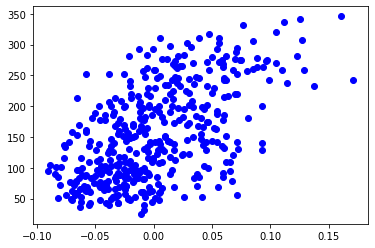

In [36]:
plt.plot(diabetes_x_train, diabetes_y_train, 'bo')

接下来，我们进行 **线性回归模型** 的创建以及对以上数据集的拟合

In [37]:
# 创建 线性回归模型 对象
regr = linear_model.LinearRegression()

# 使用 fit 函数来对模型进行训练
regr.fit(diabetes_x_train, diabetes_y_train)

# 使用训练完成的模型 对 测试数据集 来作出预测（使用 predict 函数）
diabetes_y_pred = regr.predict(diabetes_x_test)

将我们的预测结果画在图上，展示出来

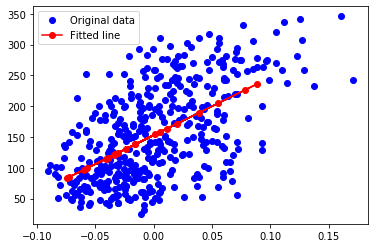

In [38]:
plt.plot(diabetes_x_train, diabetes_y_train, 'bo', label='Original data')
plt.plot(diabetes_x_test, diabetes_y_pred, 'ro-', label='Fitted line')
plt.legend()

从效果来看，上面的图，拟合的效果还是不错的。给自己点个赞吧。

### 3.3.2 - 多项式回归（Polynomial regression）

在这个例子中，我们使用构建一个 二阶多项式 形式，可以用如下的公式表示：

$$\hat{y}(w, x) = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2$$

仔细观察一下，这个仍然是我们熟悉的 **线性模型** ，如果看着不像，那我将特征提取出来表示，你再继续看：

$$z = [x_1, x_2, x_1x_2, x_1^2, x_2^2]$$

通过重新观察数据，是不是看出来一点眉目了？我们写成下面这样就一目了然了。

$$\hat{y}(w, z) = w_0 + w_1z_1 + w_2z_2 + w_3z_3 + w_4z_4 + w_5z_5$$

我们看到，多项式回归模型实际上与我们之前介绍的线性模型属于同一类（都是用权重 $w$ 乘上特征 $x$）。我们通过考虑使用这些基本函数来构建高维空间中的线性拟合，就可以灵活适应更大范围的数据。

In [39]:
# 导入 sklearn 的多项式特征转换库
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 创建 X
X = np.arange(6).reshape(3, 2)

# 转换为多项式特征
poly = PolynomialFeatures(degree=2)

# 进行转换
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

上面，我们就将特征 `X` 从 $[x_1, x_2]$ 转化为 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$ ，并且现在可以被用在任何线性模型中。

下面我们创建一个代表简单多项式回归的对象，如下所示，其中用到了 `Pipeline` 工具来简化此类预处理。

In [42]:
# 创建简单多项式回归对象
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression(fit_intercept=False))])
# 拟合 3 阶多项式回归
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

如上，`coef_` 代表的是 `w` ，也就是我们拟合得到的 **权重** 。

好了，**线性模型